<a href="https://colab.research.google.com/github/rihannababzadeh/Machine-Learning-Projects/blob/main/2022_01_Predicting_Time_Series_Data_missing_data_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting and imputing Time Series Data
> Paper: A multisource and multivariate dataset for indoor localization methods based on WLAN and geo-magnetic field fingerprinting -Ipin2016

>Dataset: measure1_smartphone_sens

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['one_day.csv']))
data.head()
# in this file, I took one day as a sample

Saving one_day.csv to one_day.csv


,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
0,1422629483,-3.577,2.104,9.078,-5.4,-17.9,-28.2,126.404,-12.169,-21.001,0,0,0
1,1422629484,-3.424,2.927,9.374,-4.3,-21.9,-26.9,134.694,-11.322,-25.898,0,0,0
2,1422629484,-2.505,2.908,8.867,-0.7,-24.4,-26.5,150.906,-17.523,-15.017,0,0,0
3,1422629484,-5.473,1.472,9.394,0.3,-25.7,-26.9,138.022,-21.068,-23.941,0,0,0
4,1422629484,-3.414,2.018,8.187,3.7,-29.6,-23.9,163.519,-12.814,-22.046,0,0,0


In [ ]:
# import pandas as pd
# pd.options.mode.chained_assignment = None  # default='warn'

# data.iloc[0]['timestamp'] =data.iloc[0]['timestamp']*0.001

In [ ]:
data.loc[4]['timestamp'] 

1422629484.0

In [ ]:
res = data

In [ ]:
data = res

In [ ]:
#data.describe()  # Getting a grasp of our numerical value statistical properties. 

In [ ]:
# Plot the raw values over time
#data.plot();

In [ ]:
# Count the missing values of each time series
missing_values = data.isnull().sum()
print(missing_values)

timestamp               0
 AccelerationX          0
 AccelerationY          0
 AccelerationZ          0
 MagneticFieldX         0
 MagneticFieldY         0
 MagneticFieldZ         0
 Z-AxisAgle(Azimuth)    0
 X-AxisAngle(Pitch)     0
 Y-AxisAngle(Roll)      0
 GyroX                  0
 GyroY                  0
 GyroZ                  0
dtype: int64


In [ ]:
#Xtimestamp = data.iloc[:,0].values  # Converting column to a numpy array.
#Xacc = data.iloc[:,1].values

In [ ]:
#Xtimestamp

We can see that there is no missing data.



Here we try to generate bad and good periods using exp 

In [ ]:
data.shape[0]

3194

In [ ]:
count = data.shape[0]
count

3194

5.621106533604986
[ 0.4052507   0.59238824  1.68652879  1.75804845  2.50296051  4.76909222
  5.05834553 10.53769075 13.85219303 15.0485671 ]
[1.49967843e+00 1.80830192e+00 5.40070116e+00 5.80110520e+00
 1.22186138e+01 1.17812246e+02 1.57330004e+02 3.77103831e+04
 1.03736358e+06 3.43170267e+06]


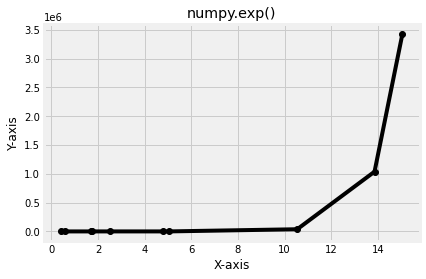

In [ ]:
#use this if you want to set the upper bound
from matplotlib import pyplot as plt 
length=50
beta = -length/np.log(1 - 0.999)
a = (np.random.exponential(beta, 10))
#print(a)
print(np.average(a))
#np.max(a)
a=np.sort(a)
#sns.kdeplot(a)
print(a)
y=np.exp(a)
print(y)

plt.plot(a, y, color='black', marker="o")
plt.title("numpy.exp()")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [ ]:
#use this if you want to set the average

#duration of good period
a= (np.random.exponential(600, size=16))
#a=np.sort(a)
print(np.average(a))
print(a)

511.9330660708777
[ 567.84216869  870.57462079  338.24407384  465.52242834  752.23442106
  211.4364288   148.14113637   11.00693559  130.40801735    8.12674891
 1599.3368789   356.3386048   783.78747822 1540.42440324   89.80069274
  317.70401949]


In [ ]:
#duration of bad period

b= (np.random.exponential(5, size=16))
#a=np.sort(a)
print(np.average(b))
print(b)

6.914731313638535
[11.71767191  4.33393499 12.31680678  0.33484989  0.72754561  1.50535742
  3.34986005  6.12960668  0.32539936 10.14626495 10.27614148  8.99752192
  5.27845022  6.69434057 13.76451329 14.73743589]


In [ ]:
#creating a list combining good and bad periods
sec=[]
#a= [1,2,3,4,5]
#b= [6,7,8,9,10]
for i in range (0,len(a)):
  sec.append(a[i])
  sec.append(b[i])
print(sec)
#consider similar timestamp

[567.8421686948337, 11.717671912976243, 870.5746207903394, 4.333934989060786, 338.24407384015234, 12.316806781473314, 465.5224283358402, 0.3348498936372619, 752.23442105856, 0.7275456102219585, 211.43642880306666, 1.5053574171413127, 148.14113636724352, 3.3498600543766184, 11.006935585962974, 6.129606675906486, 130.40801735060512, 0.3253993580449901, 8.126748912564947, 10.146264949898072, 1599.3368788975017, 10.276141483218634, 356.33860480345896, 8.997521923954098, 783.7874782241795, 5.278450221910394, 1540.424403238983, 6.694340565679086, 89.80069273873312, 13.764513288581954, 317.7040194920173, 14.737435892135355]


In [ ]:
len(sec)

32

In [ ]:
data = res
drop_list = []
count = data.shape[0] #length of data (number of rows)
#last_deleted_index=0
row=0
#get the random number
last_stamp = data.loc[0]["timestamp"] #init with the first timestamp

for j in range (0,len(sec)): #check random numbers  
  print("reached index in random",j,"number",sec[j])
  if(j%2==0):
    gp = sec[j] #the duration of good period  gp : [2.5 s] "timestamp[12.1]"
    bp=0
    print("good period of",sec[j])
  else:
    bp = sec[j] #the duration of bad period
    gp=0
    print("bad period of",sec[j])
 # while row < count:#iterating in the data and checking timestamps
  if row >= count-1:
   print("End of process at", row)
   break #end the loop
  print("row",row) 
  timestamp = data.loc[row]["timestamp"] #saving the current timestamp   []
  print("current timestamp",data.loc[row]["timestamp"])
  last_stamp = last_stamp+gp+bp #this is time, not index Last_stamp = Last_stamp+gp+bp #intit last_stamp with the first timestamp
  print("last timestamp limit",last_stamp)
  if timestamp <= data.loc[count-1]["timestamp"]:#if we have not reached the last timestamp
     #last_index = df.index[df[last_stamp]].tolist() #what is the index of the last timestamp to be deleted?
    # if bp == 0: #good period
    # row = last_index+row+1 #a fresh new row! we are done with data before this
    #bad period
     print("current row",row)
     for k in range(row,count): #from the current row to the last index [1,2,2,2,2,3,3,4,4,5] bad period is 2
        if data.loc[k]["timestamp"] <= last_stamp: #if we have not reached the last timestamp in this period
          if gp == 0 and bp>0: #bad period
            print("dropped",data.loc[k]["timestamp"])
            drop_list.append(data.loc[k]["timestamp"])
            data = data.drop(k)
        else:
          print("reached last timestamp in the period row",k, row)
          break    
     row = k #the last deleted index+1 is row now
     print("last reached row",row)
  else:
      print("reached the end of the list")
      break
#have two behaviours for odd and even index
#if a[j]+ in range (0,count): #if random number is in the correct range

reached index in random 0 number 567.8421686948337
good period of 567.8421686948337
row 0
current timestamp 1422629483.0
last timestamp limit 1422630050.8421688
current row 0
reached last timestamp in the period row 2159 0
last reached row 2159
reached index in random 1 number 11.717671912976243
bad period of 11.717671912976243
row 2159
current timestamp 1422630051.0
last timestamp limit 1422630062.5598407
current row 2159
dropped 1422630051.0
dropped 1422630051.0
dropped 1422630051.0
dropped 1422630051.0
dropped 1422630051.0
dropped 1422630051.0
dropped 1422630051.0
dropped 1422630051.0
dropped 1422630051.0
dropped 1422630051.0
dropped 1422630052.0
dropped 1422630052.0
dropped 1422630052.0
dropped 1422630052.0
dropped 1422630052.0
dropped 1422630052.0
dropped 1422630052.0
dropped 1422630052.0
dropped 1422630052.0
dropped 1422630052.0
dropped 1422630053.0
dropped 1422630053.0
dropped 1422630053.0
dropped 1422630053.0
dropped 1422630053.0
dropped 1422630053.0
dropped 1422630053.0
droppe

In [ ]:
data.shape[0]

3074

In [ ]:
len(drop_list)

120

In [ ]:
data

,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
0,1422629483,-3.577,2.104,9.078,-5.4,-17.9,-28.2,126.404,-12.169,-21.001,0,0,0
1,1422629484,-3.424,2.927,9.374,-4.3,-21.9,-26.9,134.694,-11.322,-25.898,0,0,0
2,1422629484,-2.505,2.908,8.867,-0.7,-24.4,-26.5,150.906,-17.523,-15.017,0,0,0
3,1422629484,-5.473,1.472,9.394,0.3,-25.7,-26.9,138.022,-21.068,-23.941,0,0,0
4,1422629484,-3.414,2.018,8.187,3.7,-29.6,-23.9,163.519,-12.814,-22.046,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,1422630155,-1.614,4.460,8.484,-7.2,6.8,-41.9,24.752,-28.245,-6.688,0,0,0
3190,1422630155,-3.347,5.714,6.444,-1.0,1.3,-41.9,30.585,-38.205,-21.237,0,0,0
3191,1422630155,-3.117,5.436,7.737,-1.0,1.3,-41.9,30.585,-38.205,-21.237,0,0,0
3192,1422630155,-2.868,5.800,7.900,-2.8,1.8,-41.9,32.715,-33.099,-18.249,0,0,0


In [ ]:
from google.colab import files
data.to_csv('data.csv')
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
np.savetxt("data.csv", data, delimiter=",")
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

If we want to have burst for a few seconds and rows are selected using exp random:

In [ ]:
data = res
drop_list = []
#second =1 #means the burst will last for two seconds
for j in range (0,len(a)): #check random numbers
    print("reached index in random",j,"number",a[j])
    if a[j] in range (0,count): #if random number is in the correct range
      row = a[j]
      if row not in drop_list:
        time = data.loc[row]["timestamp"]
        print("timestamp for",a[j],time)
        #print("timestamp for",a[j],data.iloc[row]["timestamp"])
        for i in range(0,count):#count is the number of rows
          #print("reached here for checking again",drop_list)
          if i not in drop_list:
          #print(droplist)
            if (data.loc[i]["timestamp"] == time+second) or (data.loc[i]["timestamp"] == time):
              print("intentional time+1 is ",time+second)
              print("intentional time is ",time)
              print(i,"row timestamp is", data.loc[i]["timestamp"])
              #data = data[data.index != i] #delete that row from the dataset (two seconds)
              drop_list.append(i)
              data = data.drop(i)
              #print(i,"added to droplist with timestamp ")
print(drop_list)           

In [ ]:
len(drop_list)#number of deleted rows

#Generating missing values- another way
The mechanisms generating missing values can be various but usually they are classified into three main categories defined by (Rubin 1976): missing completely at random (MCAR), missing at random (MAR) and missing not at random (MNAR). The first two are also qualified as ignorable missing values mechanisms, for instance in likelihood-based approaches to handle missing values, whereas the MNAR mechanism generates nonignorable missing values. 
Code is derived from https://github.com/BorisMuzellec/MissingDataOT


###MCAR

Missing Completely At Random values are generated using only the desired proportion of missing values p_miss, i.e. each value have the same probability p_miss of being missing. Therefore, we generate missing values using a Bernoulli distribution of parameter p_miss.


In [ ]:
!pip install utils

In [ ]:
import torch
from utils import *
import tensorflow as tensor

In [ ]:
X = data
timestamp = X["timestamp"]#saving the timestamp column
X=X.drop(columns=["timestamp" , "GyroX" , "GyroY" ,"GyroZ"], axis=1) #assuming that timestamps are not missing! and deleting constant columns

In [ ]:
X

In [ ]:
import math


In [ ]:
Xtr = torch.as_tensor(np.array(X).astype('float')) #convert to tensor object to prepare for the function
Xtr

In [ ]:
#X: the initial data (can be only complete for now) as a matrix or data.frame
#p_miss: proportion of missing values to generate for variables which will have missing values
#mecha: one of "MCAR", "MAR", "MNAR" (default: “MCAR”)

def produce_NA(X, p_miss, mecha="MCAR", opt=None, p_obs=None, q=None):    
    to_torch = torch.is_tensor(X) ## output a pytorch tensor, or a numpy array
    if not to_torch:
        X = X.astype(np.float32)
        X = torch.from_numpy(X)
    
    if mecha == "MAR":
        mask = MAR_mask(X, p_miss, p_obs).double()
    elif mecha == "MNAR" and opt == "logistic":
        mask = MNAR_mask_logistic(X, p_miss, p_obs).double()
    elif mecha == "MNAR" and opt == "quantile":
        mask = MNAR_mask_quantiles(X, p_miss, q, 1-p_obs).double()
    elif mecha == "MNAR" and opt == "selfmasked":
        mask = MNAR_self_mask_logistic(X, p_miss).double()
    else:
        mask = (torch.rand(X.shape) < p_miss).double()
    
    X_nas = X.clone()
    X_nas[mask.bool()] = np.nan
    
    return {'X_init': X.double(), 'X_incomp': X_nas.double(), 'mask': mask}
#X_init: the initial data
#X_incomp: the data with the newly generated missing values
#mask: a matrix indexing the generated missing values

In [ ]:
X_miss_mcar = produce_NA(Xtr, p_miss=0.4, mecha="MCAR")

X_mcar = X_miss_mcar['X_incomp'] #the new dataset
R_mcar = X_miss_mcar['mask']

print("Percentage of newly generated missing values: ", (R_mcar.sum()).numpy()/np.prod(R_mcar.size())*100, " %")

In [ ]:
X_miss_mcar['mask'] #matrix indexing the generated missing values

In [ ]:
X_mcar

In [ ]:
X_miss = X_mcar.numpy()#tensor to numpy

In [ ]:
X_miss

In [ ]:
#Xpd = pd.DataFrame(X_miss) #numpy to dataframe
Xpd=pd.DataFrame(data=X_miss, columns=X.columns) #numpy to dataframe
Xpd

In [ ]:
# Count the missing values of each time series
missing_values = Xpd.isnull().sum()
print(missing_values)

In [ ]:
# Visualize the dataset
Xpd.plot(legend=False);
plt.tight_layout();

# Count the missing values of each time series
missing_values = Xpd.isnull().sum()
print(missing_values)

### Imputing missing values
When you have missing data points, how can you fill them in?

In this exercise, you'll practice using different interpolation methods to fill in some missing values, visualizing the result each time. But first, you will create the function (```interpolate_and_plot()```) you'll use to interpolate missing data points and plot them.

In [ ]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(Xpd, interpolation):
    
    # Create a boolean mask for missing values
    missing_values = Xpd.isna()
    
    # Interpolate the missing values
    Xpd_interp = Xpd.interpolate(interpolation)
    
    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    Xpd_interp.plot(color='k', alpha=0.6, ax=ax, legend=False);
    
    # Note plot the interpolated values on top in red
    Xpd_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False);

In [ ]:
# Interpolate using the latest non-missing value
interpolation_type = 'quadratic' #try linear or zero or quadratic
interpolate_and_plot(Xpd, interpolation_type)

MICE

In [ ]:
pip install autoimpute

In [ ]:
# simple example using default instance of MiceImputer
from autoimpute.imputations import SingleImputer, MultipleImputer, MiceImputer

In [ ]:
# simple example using default instance of MiceImputer
imp = MiceImputer()

# fit transform returns a generator by default, calculating each imputation method lazily
imp.fit(Xpd)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(Xpd)
#IterativeImputer(random_state=0)
Xpd_filled = imp_mean.transform(Xpd)

In [ ]:
transformed=pd.DataFrame(data=Xpd_filled, columns=X.columns) #numpy to dataframe

In [ ]:
transformed #this is the dataset after imputation

In [ ]:
data

In [ ]:
Xpd_filled

another try

In [ ]:
from autoimpute.imputations import SingleImputer, MultipleImputer, MiceImputer
si = SingleImputer() # pass through data once
mi = MultipleImputer() # pass through data multiple times
mice = MiceImputer() # pass through data multiple times and iteratively optimize imputations in each column

In [ ]:
#dataframe to narray
#nXpd = Xpd.to_numpy()

In [ ]:
#nXpd

In [ ]:
# simple example using default instance of MiceImputer
#imp = MiceImputer()

# fit transform returns a generator by default, calculating each imputation method lazily
#nXpd_filled = imp.fit_transform(Xpd)

In [ ]:
#nXpd_filled

In [ ]:
#transformed=pd.DataFrame(data=nXpd_filled, columns=X.columns) #generator object to dataframe

### Visualizing predicted values
When dealing with time series data, it's useful to visualize model predictions on top of the "actual" values that are used to test the model.

In this exercise, after splitting the data (stored in the variables ```X``` and ```y```) into training and test sets, you'll build a model and then visualize the model's predictions on top of the testing data in order to estimate the model's performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                   shuffle=False, random_state=1)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

In [ ]:
# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(range(len(y_test)), y_test, color='k', lw=3);
ax.plot(range(len(predictions)), predictions, color='r', lw=2);

## Advanced time series prediction
- Data is messy
    - Real-world data is often messy
    - The two most common problems are missing data and outliers
    - This often happens because of human error, machine error malfunction, database failure, etc..
    - Visualizing your raw data makes it easier to spot these problems
- Interpolation: using time to fill in missing data
    - A common way to deal with missing data is to interpolate missing values
    - With timeseries data, you can use time to assist in interpolation.
    - In this case, interpolation means using the known values on either side of a gap in the data to make assumptions about what's missing
- Using a rolling window to transform data
    - Another common use of rolling windows is to transform the data
- Finding outliers in your data
    - Outliers are datapoints that are significantly statistically different from the dataset.
    - They can have negative effects on the predictive power of your model, biasing it away from its "true" value
    - One solution is to remove or replace outliers with a more representative value
> Note: Be very careful about doing this - often it is difficult to determine what is a legitimately extreme value vs an abberation.

### Visualizing messy data
Let's take a look at a new dataset - this one is a bit less-clean than what you've seen before.

As always, you'll first start by visualizing the raw data. Take a close look and try to find datapoints that could be problematic for fitting models.

In [ ]:
prices = pd.read_csv('./dataset/prices_null.csv', index_col=0, parse_dates=True)

In [ ]:
# Visualize the dataset
prices.plot(legend=False);
plt.tight_layout();

# Count the missing values of each time series
missing_values = prices.isnull().sum()
print(missing_values)

### Transforming raw data
In the last chapter, you calculated the rolling mean. In this exercise, you will define a function that calculates the percent change of the latest data point from the mean of a window of previous data points. This function will help you calculate the percent change over a rolling window.

This is a more stable kind of time series that is often useful in machine learning.

In [ ]:
# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]
    
    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

# Apply your custom function and plot
prices_perc = prices.rolling(20).apply(percent_change)
prices_perc.loc["2014":"2015"].plot();

### Handling outliers
In this exercise, you'll handle outliers - data points that are so different from the rest of your data, that you treat them differently from other "normal-looking" data points. You'll use the output from the previous exercise (percent change over time) to detect the outliers. First you will write a function that replaces outlier data points with the median value from the entire time series.

In [ ]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the difference that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median across the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing functino to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot();

## Creating features over time
- Calculating "date-based" features
    - Thus far we've focused on calculating "statistical" features - these are features that correspond statistical properties of the data, like "mean" , "standard deviation", etc
    - However, don't forget the timeseries data oftenhas more "human" features associated with it, like days of the week, holidays, etc.
    - These features are often useful when dealing with timeseries data that spans multiple years (such as stock value over time)

### Engineering multiple rolling features at once
Now that you've practiced some simple feature engineering, let's move on to something more complex. You'll calculate a collection of features for your time series data and visualize what they look like over time. This process resembles how many other time series models operate.

In [ ]:
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_perc_rolling = prices_perc['EBAY'].rolling(20, min_periods=5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for your rolling window object
features = prices_perc_rolling.aggregate(features_to_calculate)

# Plot the results
ax = features.loc[:"2011-01"].plot();
prices_perc['EBAY'].loc[:"2011-01"].plot(ax=ax, color='k', alpha=0.2, lw=3);
ax.legend(loc=(1.01, 0.6));

### Percentiles and partial functions
In this exercise, you'll practice how to pre-choose arguments of a function so that you can pre-configure how it runs. You'll use this to calculate several percentiles of your data using the same ```percentile()``` function in numpy.

In [ ]:
from functools import partial
percentiles = [1, 10, 25, 50, 75, 90, 99]

# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc['EBAY'].rolling(20, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.aggregate(percentile_functions)

# Plot a subset of the result
ax = features_percentiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis);
ax.legend(percentiles, loc=(1.01, 0.5));
plt.savefig('../images/price_percentile.png')

### Using "date" information
It's easy to think of timestamps as pure numbers, but don't forget they generally correspond to things that happen in the real world. That means there's often extra information encoded in the data such as "is it a weekday?" or "is it a holiday?". This information is often useful in predicting timeseries data.

In [ ]:
# Extract date features from the data, add them as columns
prices_perc['day_of_week'] = prices_perc.index.dayofweek
prices_perc['week_of_year'] = prices_perc.index.weekofyear
prices_perc['month_of_year'] = prices_perc.index.month

# Print prices_perc
print(prices_perc)